# Problem Statement
## Context
Some banking institutions use marketing campaigns to make clients subscribe to their services. One of those services is the term deposit, which restricts withdrawing the deposit until the term ends. This deposit allows a higher flexibility in budget management because it doesn't affect the "liquidity coverage ratio" (the amount of money that the bank has to be able to pay instantly). Therefore, predicting and identifying customers who are prone to subscribe to term deposits is beneficial.

## Goal
The goal is to predict what type of customers will probably subscribe to term deposits by answering the following questions:
* What kind of customers usually subscribe to term deposits?
* By adjusting which marketing parameters banking insitution can increase chances of subscription?
* What type of customers marketing team should focus on for their next marketing campaign?

# Data Collection
## Data Source
I used "Bank Marketing" dataset from Kaggle provided by user Henrique Yamahata. [https://www.kaggle.com/henriqueyamahata/bank-marketing?select=bank-additional-full.csv]

## Data description

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Attributes can be divided into the following groups:

### Client data:
* Age (numeric)
* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

### Current campaign
* Contact: last contact communication type (categorical: 'cellular','telephone')
* Month: last contact month of year (categorical: 'jan', 'feb', 'mar',…, 'nov', 'dec')
* Dayofweek: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* Duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
* Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

### Previous campaign 
* Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* Previous: number of contacts performed before this campaign and for this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')

### Social and economic context attributes
* Emp.var.rate: employment variation rate - quarterly indicator (numeric)
* Cons.price.idx: consumer price index - monthly indicator (numeric)
* Cons.conf.idx: consumer confidence index - monthly indicator(numeric)
* Euribor3m: euribor 3 month rate - daily indicator (numeric)
* Nr.employed: number of employees - quarterly indicator (numeric)

### Output variable
* y - has the client subscribed a term deposit? (binary: 'yes', 'no')

# Exploratory Data Analysis
## 1. Understanding Client data
For more convenient use I will create new DataFrame with only Client data.

In [4]:
#Selecting client related columns
client_data = data.iloc[:, :7]
#Adding 'y'
client_data = pd.concat([client_data, data.y], axis = 1)
client_data.head()

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no
1,57,services,married,high.school,unknown,no,no,no
2,37,services,married,high.school,no,yes,no,no
3,40,admin.,married,basic.6y,no,no,no,no
4,56,services,married,high.school,no,no,yes,no


### 1.1 Age
Trying to find insights.

In [5]:
#Displaying general information about the data
client_data.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [6]:
#Checking for null values
print('Null Values: ', client_data.age.isnull().any())

Null Values:  False


### Data visualization

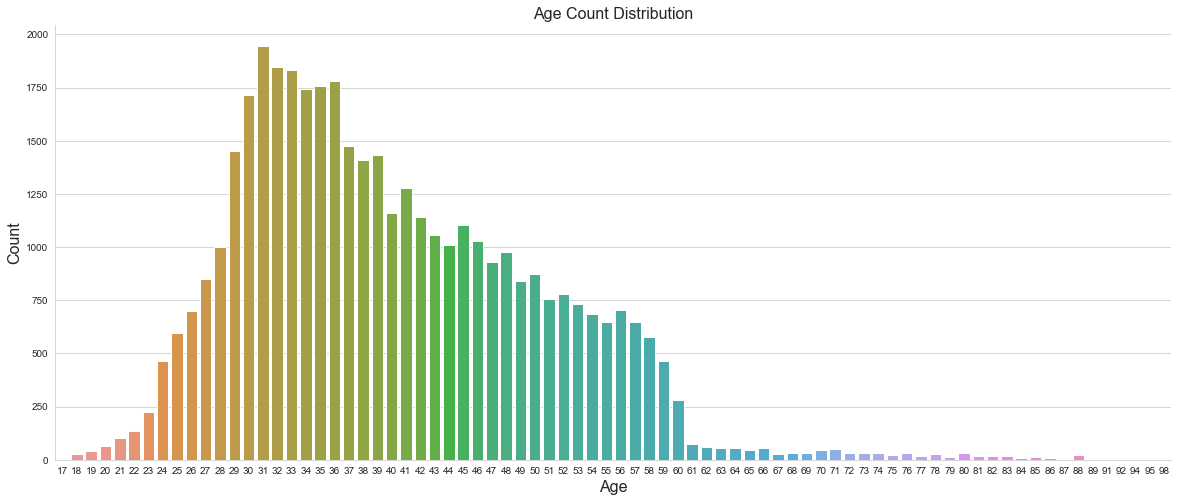

In [7]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = client_data)
ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Age Count Distribution', fontsize=16)
sns.despine()

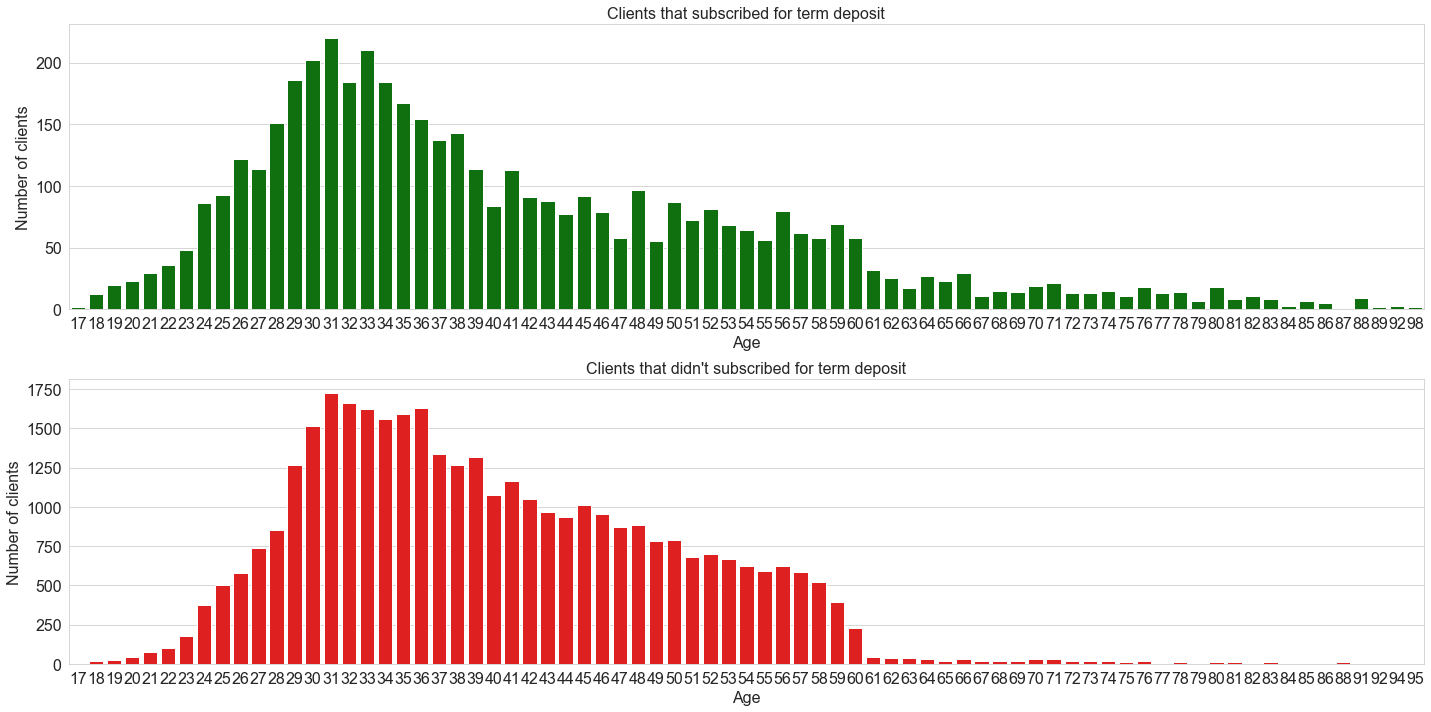

In [8]:
#Comparing age distribution of subscribers and non-susbcribers
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 10))
sns.countplot(x = 'age', data = client_data[client_data.y == 'yes'], ax = ax1, color = 'green')
ax1.set_xlabel('Age', fontsize=16)
ax1.set_ylabel('Number of clients', fontsize=16)
ax1.set_title('Clients that subscribed for term deposit', fontsize=16)
ax1.tick_params(labelsize=16)

sns.countplot(x = 'age', data = client_data[client_data.y == 'no'], ax = ax2, color = 'red')
ax2.set_xlabel('Age', fontsize=16)
ax2.set_ylabel('Number of clients', fontsize=16)
ax2.set_title("Clients that didn't subscribed for term deposit", fontsize=16)
ax2.tick_params(labelsize=16)

plt.subplots_adjust(wspace=1)
plt.tight_layout() 

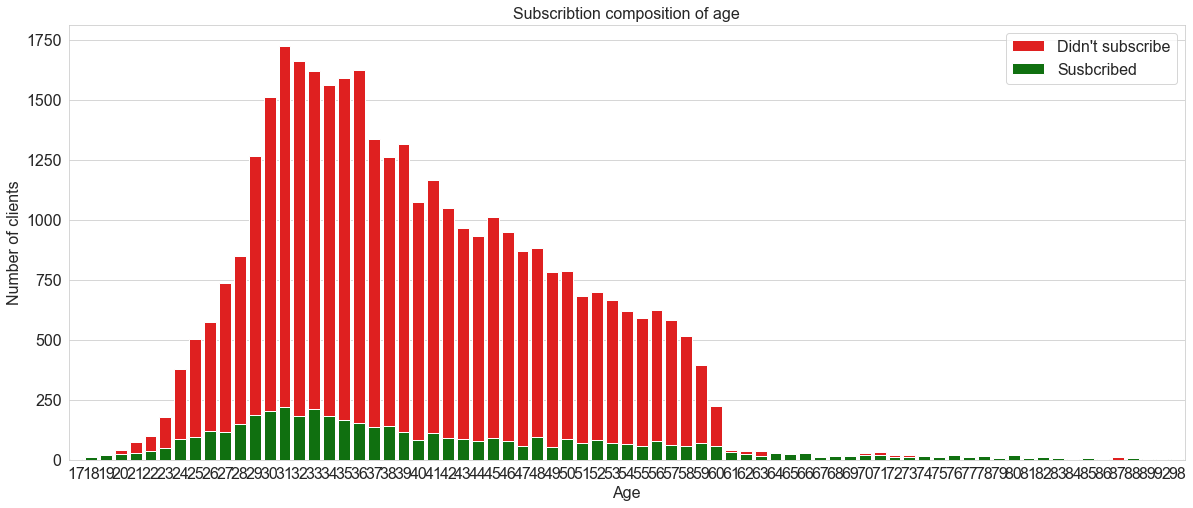

In [9]:
#Comparing subscribtion composition of each age
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = client_data[client_data.y == 'no'], label="Didn't subscribe", color = 'red')
sns.countplot(x = 'age', data = client_data[client_data.y == 'yes'], label="Susbcribed", color = 'green')

ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Number of clients', fontsize=16)
ax.set_title("Subscribtion composition of age", fontsize=16)
ax.tick_params(labelsize=16)
plt.legend(fontsize=16)

It can be clearly seen that people over 60 have different subscriber composition. Let's display only them.

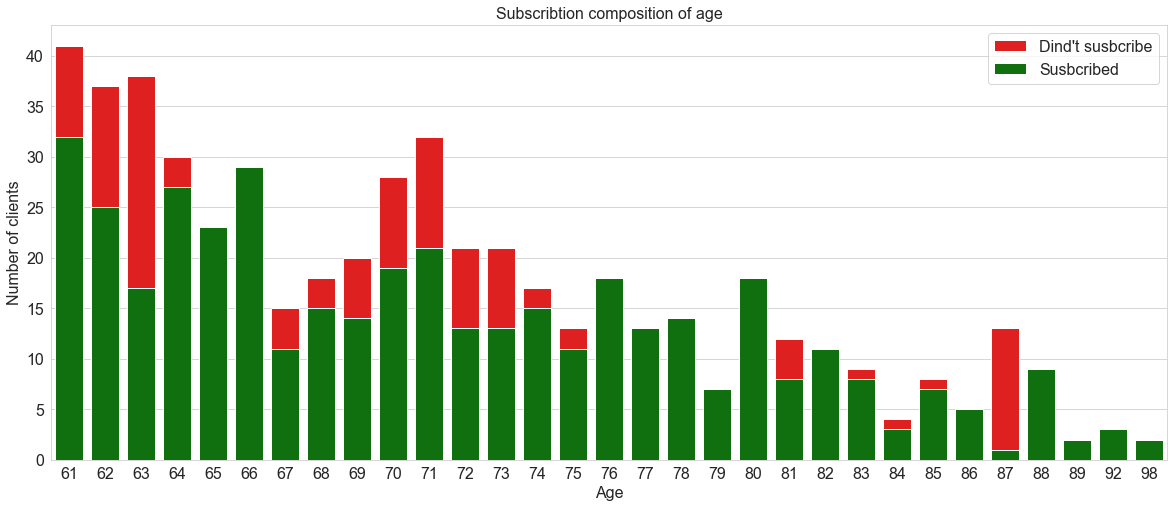

In [10]:
#Comparing subscribtion composition of people over 60
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = client_data.loc[(client_data.y == 'no') & (client_data.age > 60)], label="Dind't susbcribe", color = 'red')
sns.countplot(x = 'age', data = client_data.loc[(client_data.y == 'yes') & (client_data.age > 60)], label="Susbcribed", color = 'green')

ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Number of clients', fontsize=16)
ax.set_title("Subscribtion composition of age", fontsize=16)
ax.tick_params(labelsize=16)
plt.legend(fontsize=16)

WOW! It is interesting that people of age are more interested in susbscribing for term deposits.

In [11]:
print('Total number of clients over 60:', client_data[client_data.age > 60].age.count())
print('Total proportion of clients over 60:', client_data[client_data.age > 60].age.count() / client_data.age.count() * 100, '%')

Total number of clients over 60: 910
Total proportion of clients over 60: 2.2093813732155 %


Unfortunately, they constitute a miniscule number of the people compared to total number of clients participated in this campaign. However, it is still might be valuable information for smaller marketing campaigns.

Let's see efficiency of the marketing campaign on different age groups.

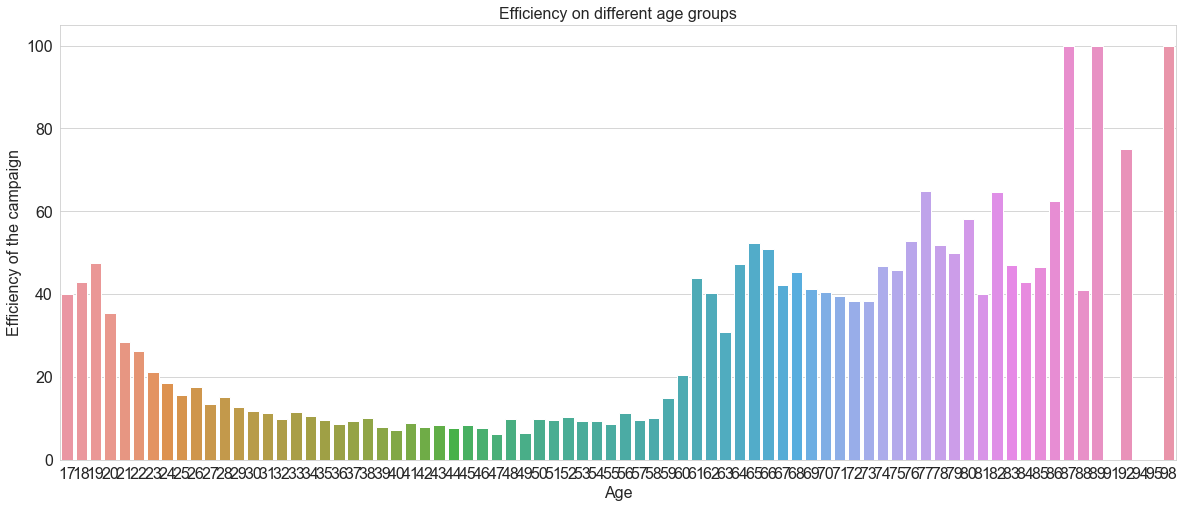

In [36]:
#Create an array to store efficiency of eacht
efficiency = []
for age_value in np.sort(client_data.age.unique()):
    efficiency.append(client_data.loc[(client_data.y == 'yes') & (client_data.age == age_value)].age.count() / client_data[client_data.age == age_value].age.count() * 100) 

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

sns.barplot(x=np.sort(client_data.age.unique()), y=efficiency)

ax.set_xlabel('Age', fontsize=16)
ax.set_ylabel('Efficiency of the campaign', fontsize=16)
ax.set_title("Efficiency on different age groups", fontsize=16)
ax.tick_params(labelsize=16)

Despite the fact that number of clients over 60 is miniscule, it is noteworthy fact that campaign was 3-4 times more effective on them.

### Insights (Age)
* Majority of bank clients is in the age between 31 and 36 years
* Mean age is 40 and Median age is 38
* Clients over 60 are 3-4 times more willing to subscribe for term deposits than average client.